Importing Libraries

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix,recall_score,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will use Random Forest Classifier and Logistic Regression ML models.

Collaboration Dataset loading in 'df'

In [2]:
df=pd.read_csv('author_collab_JN_unique.csv')
df

,author_1,author_2,collab_label,year
0,0,57,1,1963
1,0,57,1,1964
2,0,73,1,1963
3,0,73,1,1964
4,0,109,1,1961
...,...,...,...,...
341033,80285,80284,1,2017
341034,80286,61649,1,2017
341035,80286,80287,1,2017
341036,80287,61649,1,2017


In [3]:
#types of columns
print(df.dtypes)

author_1        int64
author_2        int64
collab_label    int64
year            int64
dtype: object


This column type is perfect to learn in those Models.

Non-Collaboration dataset loading 'pf'

In [4]:
pf=pd.read_csv('author_non_collab_JN_unique.csv')
pf

,author_1,author_2,collab_label,year
0,0,58,0,NaN
1,0,59,0,NaN
2,0,58,0,NaN
3,0,59,0,NaN
4,0,74,0,NaN
...,...,...,...,...
507600,80286,80289,0,NaN
507601,80287,61650,0,NaN
507602,80287,61651,0,NaN
507603,80287,80287,0,NaN


In [5]:
print(pf.dtypes)

author_1          int64
author_2          int64
collab_label      int64
year            float64
dtype: object


This column type also is perfect to learn in those Models.

EDA and Dataset Characteristics

In [6]:
#checking correlation
df.corr()

,author_1,author_2,collab_label,year
author_1,1.000000,0.681700,NaN,0.712644
author_2,0.681700,1.000000,NaN,0.712644
collab_label,NaN,NaN,NaN,NaN
year,0.712644,0.712644,NaN,1.000000


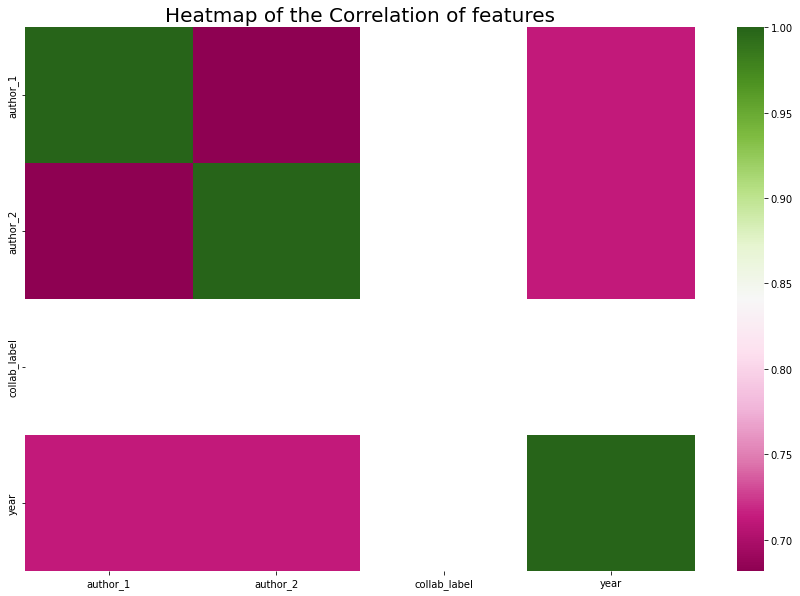

In [7]:
plt.figure(figsize = (15,10))
plt.title('Heatmap of the Correlation of features', fontsize = 20)
sns.heatmap(df.corr(), cmap = 'PiYG')
plt.show()

There is no relation between the columns for collaboration datasets. And we know that non-collaboration dataset is also same type so the correlation that should be same. So, it is not shown.

Preprosessing before train test split

In [8]:
#for non-collaboration
#null value filling with 0 values for year and also converting 'year' column type into int64
pf["year"] = pf["year"].fillna(0).astype(np.int64)
pf

,author_1,author_2,collab_label,year
0,0,58,0,0
1,0,59,0,0
2,0,58,0,0
3,0,59,0,0
4,0,74,0,0
...,...,...,...,...
507600,80286,80289,0,0
507601,80287,61650,0,0
507602,80287,61651,0,0
507603,80287,80287,0,0


In [9]:
#unique non-collaboration
pf=np.array(pf)
pf=np.unique(pf, axis=0)
print(len(pf))
#creating dataframe of unique non-collaboration list
pf= pd.DataFrame(pf, columns = ['author_1','author_2','collab_label','year'])
pf.dtypes

400737


author_1        int64
author_2        int64
collab_label    int64
year            int64
dtype: object

In [10]:
print(pf.dtypes)

author_1        int64
author_2        int64
collab_label    int64
year            int64
dtype: object


Now, the both dataframe files are same typed and ready to marge.

In [11]:
#sorting through year
df = df.sort_values(by=['year'])
df

,author_1,author_2,collab_label,year
12,3,4,1,1958
58,16,15,1,1958
30,9,10,1,1958
31,10,9,1,1958
32,10,17,1,1958
...,...,...,...,...
214576,46464,80069,1,2017
56867,11279,80202,1,2017
214575,46464,80068,1,2017
214574,46464,70923,1,2017


We have split 60% train data and 40% test data from the files. In neo4j we split the data by following :

the year from 2006 is for test data and all the rest is for training data. 

So we should split the collaboration list by the same manner.

In [12]:
#test data from 1958 to 2006
test_df=df[df['year']>=2006]
test_df

,author_1,author_2,collab_label,year
222550,48616,48614,1,2006
219266,47736,7101,1,2006
213701,46179,49387,1,2006
212900,45949,51577,1,2006
213047,45980,48829,1,2006
...,...,...,...,...
214576,46464,80069,1,2017
56867,11279,80202,1,2017
214575,46464,80068,1,2017
214574,46464,70923,1,2017


In [13]:
#training data from 1958 to 2006
train_df=df[df['year']<2006]
train_df

,author_1,author_2,collab_label,year
12,3,4,1,1958
58,16,15,1,1958
30,9,10,1,1958
31,10,9,1,1958
32,10,17,1,1958
...,...,...,...,...
200104,42386,44669,1,2005
200302,42432,39689,1,2005
199049,42143,42144,1,2005
200107,42387,42386,1,2005


Now, Time for train, test labeling for collaboration file. Here year is not counted because the data is already sorted before.

In [14]:
#capital X and Y is for collaboration file.
X_train=train_df[['author_1','author_2']]
Y_train=train_df['collab_label']
X_test=test_df[['author_1','author_2']]
Y_test=test_df['collab_label']

The main dataset length is 341038. The train dataset and test dataset are 175650 and 165388 respectively. Here the spliting percentage is 52% training and 48% testing which is not done in our graph database approach. And if we only keep collaboration data the ML model will overfeed so we have to split non-collaboration data in a way that the total train test split will become 60% and 40% according to our graph database approach.

In [15]:
#small x and y is for non collaboration file.
x=pf[['author_1','author_2']]
y=pf['collab_label']

If we split our non-collaboration data by 67.23% train size and then marge with collaboration train and test then the both train test will have 0 and 1 lebel which is appropriate and also the data will be splited into 60%-40% train test.

As non-collaboration has no specific year value, we split them randomly.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6723, random_state=100, shuffle=True)

In [17]:
#marging the train datas
frames = [X_train, x_train]
train_x = pd.concat(frames)
frames = [Y_train, y_train]
train_y = pd.concat(frames)
#marging the test data
frames = [X_test, x_test]
test_x = pd.concat(frames)
frames = [Y_test, y_test]
test_y = pd.concat(frames)

Model Fitting and Evaluation

Random Forest

In [18]:
rf = RandomForestClassifier(n_estimators =100, n_jobs =4)
rf.fit(train_x,train_y)
y_rf_pred = rf.predict(test_x)
cnf_matrix = confusion_matrix(y_rf_pred, test_y)
print (cnf_matrix)

[[ 98469 156836]
 [ 32853   8552]]


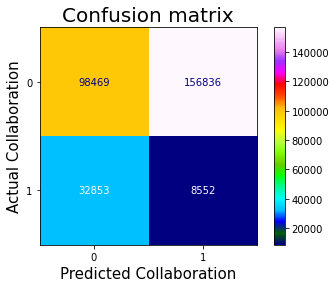

In [19]:
#ploting confusion matrix into a chart
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap='gist_ncar', values_format = '.0f')
disp.ax_.grid(False)
plt.title('Confusion matrix', fontsize = 20)
plt.ylabel('Actual Collaboration', fontsize = 15)
plt.xlabel('Predicted Collaboration', fontsize = 15)
plt.show()

In [20]:
print(classification_report(y_rf_pred, test_y))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51    255305
           1       0.05      0.21      0.08     41405

    accuracy                           0.36    296710
   macro avg       0.40      0.30      0.30    296710
weighted avg       0.65      0.36      0.45    296710



In [21]:
recall_score(y_rf_pred,test_y)

0.20654510324839995

In [22]:
accuracy_score(y_rf_pred,test_y)

0.3606922584341613

In [23]:
probs = rf.predict_proba(test_x)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(test_y, probs)
roc_auc = metrics.roc_auc_score(test_y, probs)

Text(0, 0.5, 'True Positive Rate')

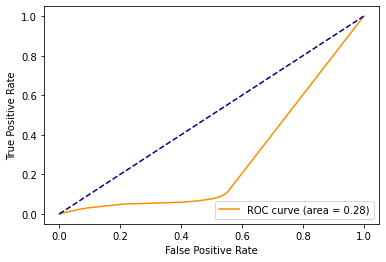

In [24]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Logistic Regression

In [25]:
rf = LogisticRegression(solver='newton-cg')
rf.fit(train_x,train_y)
y_rf_pred = rf.predict(test_x)
cnf_matrix = confusion_matrix(y_rf_pred, test_y)
print (cnf_matrix)

C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Pyt

[[ 98215 157100]
 [ 33107   8288]]


C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Hera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


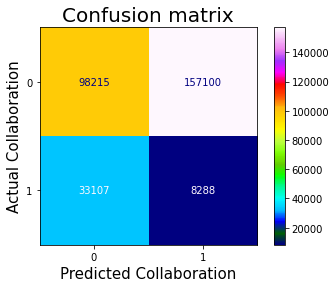

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot(cmap='gist_ncar', values_format = '.0f')
disp.ax_.grid(False)
plt.title('Confusion matrix', fontsize = 20)
plt.ylabel('Actual Collaboration', fontsize = 15)
plt.xlabel('Predicted Collaboration', fontsize = 15)
plt.show()

In [27]:
print(classification_report(y_rf_pred, test_y, zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.38      0.51    255315
           1       0.05      0.20      0.08     41395

    accuracy                           0.36    296710
   macro avg       0.40      0.29      0.29    296710
weighted avg       0.65      0.36      0.45    296710



In [28]:
accuracy_score(y_rf_pred,test_y)
#y_rf_pred

0.35894644602473796

In [29]:
probs = rf.predict_proba(test_x)
probs = [p[1] for p in probs]
fpr, tpr, thresholds = metrics.roc_curve(test_y, probs)
roc_auc = metrics.roc_auc_score(test_y, probs)

Text(0, 0.5, 'True Positive Rate')

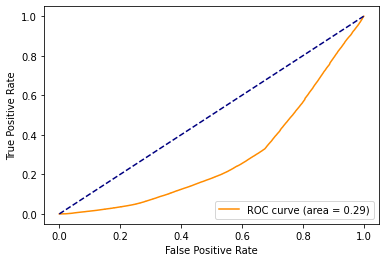

In [30]:
plt.plot(fpr, tpr, color = 'darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')